In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
#Reading excel file in python notebook
df = pd.read_excel('titanic3.xls')

Basic Exploratory Data Analytics (Task 1)

In [5]:

df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [7]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

Data Manipulation Section

In [8]:

# Dropping columns which would not affect the outcome of the model
df = df.drop(columns=['cabin','boat','body','home.dest','name','ticket'])

In [9]:
df.describe()

,pclass,survived,age,sibsp,parch,fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


In [10]:
df.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29.0000,0,0,211.3375,S
1,1,1,male,0.9167,1,2,151.5500,S
2,1,0,female,2.0000,1,2,151.5500,S
3,1,0,male,30.0000,1,2,151.5500,S
4,1,0,female,25.0000,1,2,151.5500,S


In [11]:
# Identifying the columns with missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   sex       1309 non-null   object 
 3   age       1046 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   fare      1308 non-null   float64
 7   embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 81.9+ KB


Managing Missing Values Section (Task 2)

In [12]:
# Because of how much age data is missing, we want to fill it without affecting the shape of the data we currently have. As such, I went with mode because its less skewed than using mean
df['age'] = df['age'].fillna(df['age'].median())

In [13]:
# Here, I went with mean instead because fare prices should mostly follow a normal distribution as fare prices should not be priced too unreasonably and thus mean would be 'more acurrate'. 
# Additionally, there is only 1 missing values.
df['fare'] = df['fare'].fillna(df['fare'].mean())

In [14]:
# Here, I went with mode because there were only 2 values missing and its a categorical variable so using the most common value would make the most sense
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   sex       1309 non-null   object 
 3   age       1309 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   fare      1309 non-null   float64
 7   embarked  1309 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 81.9+ KB


In [16]:
import matplotlib as mpl

<Axes: >

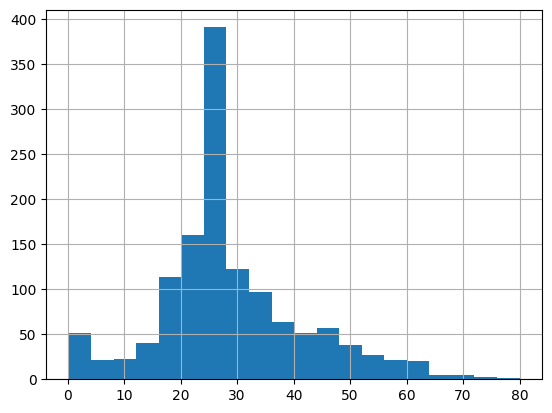

In [17]:
# Viewing the 'shape' of the age axis
df.age.hist(bins=20)

Encoding Categorical Variables (Task 3)

In [18]:
from sklearn.preprocessing import OneHotEncoder

In [19]:
# Assigning categorical data values to a variable
catergorical_cols = ['sex', 'embarked']

In [20]:
# This line is to transform categorical columns into binary values for the model to be able to read. I kept the drop as false to retain the richness of the data.
df = pd.get_dummies(df, columns=catergorical_cols, drop_first=False)

In [21]:
df.head()

,pclass,survived,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,1,1,29.0000,0,0,211.3375,True,False,False,False,True
1,1,1,0.9167,1,2,151.5500,False,True,False,False,True
2,1,0,2.0000,1,2,151.5500,True,False,False,False,True
3,1,0,30.0000,1,2,151.5500,False,True,False,False,True
4,1,0,25.0000,1,2,151.5500,True,False,False,False,True


Feature Scaling (Task 4)

In [22]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [23]:
# Standardization (Mean = 0, Std Dev = 1)
standard_scaler = StandardScaler()
df_standardised = df.copy()
df_standardised[['fare', 'age']] = standard_scaler.fit_transform(df_standardised[['fare', 'age']])

# Normalization (Scaled to range [0,1])
minmax_scaler = MinMaxScaler()
df_normalised = df.copy()
df_normalised[['fare', 'age']] = minmax_scaler.fit_transform(df_normalised[['fare', 'age']])

# Display first few rows of each to view 
print("Standardised Data:\n", df_standardised.head())
print("\nNormalised Data:\n", df_normalised.head())

# In this scenario, as I will be training logistic regression model, it might be better to use StandardScaler as it standardises values to zero mean & unit variance. 
# MinMaxScaler would be make the model sensitive to outliers.


Standardised Data:
    pclass  survived       age  sibsp  parch      fare  sex_female  sex_male  \
0       1         1 -0.039005      0      0  3.442480        True     False   
1       1         1 -2.215952      1      2  2.286476       False      True   
2       1         0 -2.131977      1      2  2.286476        True     False   
3       1         0  0.038512      1      2  2.286476       False      True   
4       1         0 -0.349075      1      2  2.286476        True     False   

   embarked_C  embarked_Q  embarked_S  
0       False       False        True  
1       False       False        True  
2       False       False        True  
3       False       False        True  
4       False       False        True  

Normalised Data:
    pclass  survived       age  sibsp  parch      fare  sex_female  sex_male  \
0       1         1  0.361169      0      0  0.412503        True     False   
1       1         1  0.009395      1      2  0.295806       False      True   
2       1

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
# Setting 'survived' as the target in our logistic model and everything else as X
X = df.drop(columns=['survived'])  # Features
Y = df['survived']  # Target

#Splitting data into 70% training, 15% validation, 15% test. No real reason why I chose this split, feels the numbers look more balanced this way.


# Split into 70% training, 15% validation, 15% test
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, stratify=Y_temp, random_state=42)


Feature Selection (Task 7)

We do not carry out task 6 & 7 on the entire dataset because we would have no way to test the accuracy of the model. Our model would give us a 100% accuracy rate which is unrealistic.

In [26]:
# SMOTE generates synthetic examples whilst still retaining the overall distribution of the minority class which is ideal in our case here. 
# The way it spreads the synthetic samples evenly also makes it better for generalising especially for our model used & less sensitive to noise.

from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train, Y_train = smote.fit_resample(X_train, Y_train)



In [27]:
from sklearn.feature_selection import VarianceThreshold

In [28]:
#Remove features with low variance & correlation so that we do not overtune our model and remove features that are not useful
selector = VarianceThreshold(threshold=0.01)
from sklearn.feature_selection import VarianceThreshold

# Remove features with low variance
selector = VarianceThreshold(threshold=0.01)
X_train = selector.fit_transform(X_train)
X_val = selector.transform(X_val)
X_test = selector.transform(X_test)

Training a Logistic Regression Model (Task 8)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Increase max_iter to ensure convergence
model = LogisticRegression(max_iter=500)
model.fit(X_train, Y_train)

# Make predictions
Y_pred = model.predict(X_val)

# Check accuracy
print("Validation Accuracy:", accuracy_score(Y_val, Y_pred))

Validation Accuracy: 0.8316326530612245
